In [626]:
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display, HTML
import numpy as nm, pandas as pa, matplotlib.pyplot as wismt, seaborn as py_seb, os, datetime
from scipy.stats import chi2_contingency
from sklearn import preprocessing, decomposition, feature_selection, utils, model_selection, pipeline, metrics
from sklearn import neural_network, svm, neighbors, ensemble, tree, linear_model, naive_bayes
import pickle

In [627]:
def DataRead():
    fetscnbr=['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape',
           'Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin',
           'Normal Nucleoli','Mitoses','Class']
    dname="breast-cancer-wisconsin.data"
    datawis=pa.read_csv(dname, names=fetscnbr)
    datawis=datawis.drop('Sample code number',axis=1)
    display(HTML(datawis.head().to_html()))
    print("Information of Data Features\n")
    print(datawis.info())
    return datawis,fetscnbr[1:]

In [636]:
WisCon, DataTmp=DataRead()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


Information of Data Features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB
None


In [595]:
WisCon.iloc[20:30]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
20,7,3,2,10,5,10,5,4,4,4
21,10,5,5,3,6,7,7,10,1,4
22,3,1,1,1,2,1,2,1,1,2
23,8,4,5,1,2,?,7,3,1,4
24,1,1,1,1,2,1,3,1,1,2
25,5,2,3,4,2,7,3,6,1,4
26,3,2,1,1,1,1,2,1,1,2
27,5,1,1,1,2,1,2,1,1,2
28,2,1,1,1,2,1,2,1,1,2
29,1,1,3,1,2,1,1,1,1,2


In [647]:
WisCon.isna().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [597]:
def CleanQMark(datawis, wisfets):
    ArrayWD=nm.array(datawis)
    for r in range(ArrayWD.shape[0]):
        for c in range(ArrayWD.shape[1]):
            if ArrayWD[r][c]=='?':
                ArrayWD[r][c]=pa.Series(ArrayWD.T[c]).mode()[0]
            else:
                ArrayWD[r][c]=ArrayWD[r][c]
    Transposed=ArrayWD.T
    value_dictionary={
        "{}".format(wisfets[x]):Transposed[x]
        for x in range(len(wisfets))
    }
    cleaned_datawis=pa.DataFrame(value_dictionary, columns=wisfets)
    cleaned_datawis['Class']=nm.array(datawis['Class'],str)
    display(HTML(cleaned_datawis.head().to_html()))
    print('Feature Information and Cleaning\n')
    print(cleaned_datawis.info())
    return cleaned_datawis

In [648]:
Cl_WisCon=CleanQMark(WisCon, DataTmp)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


Feature Information and Cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    object
 1   Uniformity of Cell Size      699 non-null    object
 2   Uniformity of Cell Shape     699 non-null    object
 3   Marginal Adhesion            699 non-null    object
 4   Single Epithelial Cell Size  699 non-null    object
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    object
 7   Normal Nucleoli              699 non-null    object
 8   Mitoses                      699 non-null    object
 9   Class                        699 non-null    object
dtypes: object(10)
memory usage: 54.7+ KB
None


In [649]:
def PrepareFeature(datawis):
    datawis1=datawis.copy()
    objfetwis=datawis1.dtypes[datawis1.dtypes=='object'].index.tolist()[:-1]
    trgfetwis=datawis1['Class'].copy()
    for ofw in objfetwis:
        datawis1[ofw]=datawis1[ofw].replace(datawis1[ofw].unique(),["Label_{}".format(x) for x in datawis1[ofw].unique()])
    datawis1['Class']=datawis1['Class'].replace(datawis1['Class'].unique(),['Benign','Malignant'])
    display(HTML(datawis1.head().to_html()))
    return datawis1

In [650]:
Prep_WisCon=PrepareFeature(Cl_WisCon)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,Label_5,Label_1,Label_1,Label_1,Label_2,Label_1,Label_3,Label_1,Label_1,Benign
1,Label_5,Label_4,Label_4,Label_5,Label_7,Label_10,Label_3,Label_2,Label_1,Benign
2,Label_3,Label_1,Label_1,Label_1,Label_2,Label_2,Label_3,Label_1,Label_1,Benign
3,Label_6,Label_8,Label_8,Label_1,Label_3,Label_4,Label_3,Label_7,Label_1,Benign
4,Label_4,Label_1,Label_1,Label_3,Label_2,Label_1,Label_3,Label_1,Label_1,Benign


In [651]:
def VZDataWis(datawis):
    classwis=datawis.columns.tolist()[:-1]
    for c in classwis:
        pa.crosstab(Prep_WisCon[c],Prep_WisCon['Class']).plot(kind='barh', color=['#ADFF2F','#00CED1'], figsize=(8,4))
        wismt.title('Breast Cancer by {}'.format(c),fontsize=20,color="b")
        wismt.ylabel('{}'.format(c),fontsize=17,color="b")
        wismt.xlabel('Value',fontsize=17,color="b")
        wismt.grid()
        wismt.show()
    print(datawis['Class'].value_counts())
    datawis['Class'].value_counts().plot(kind='barh', color=['g','r'], figsize=(5,3))
    wismt.title('Breast Cancer Class Distribution',fontsize=20,color="b")
    wismt.ylabel('Class',fontsize=17,color="b")
    wismt.xlabel('Distribution',fontsize=17,color="b")
    wismt.grid()
    wismt.show()

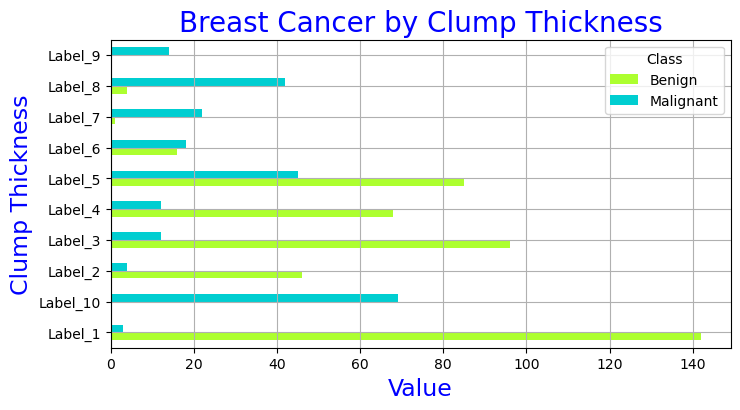

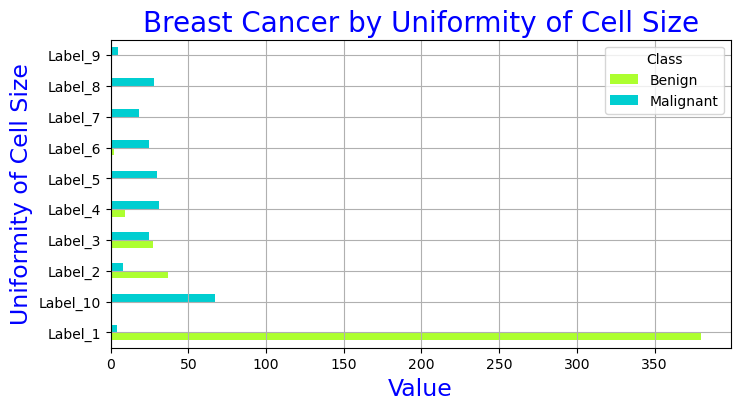

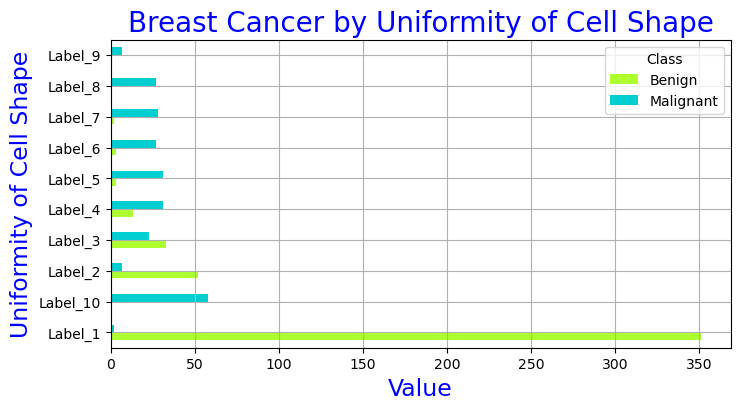

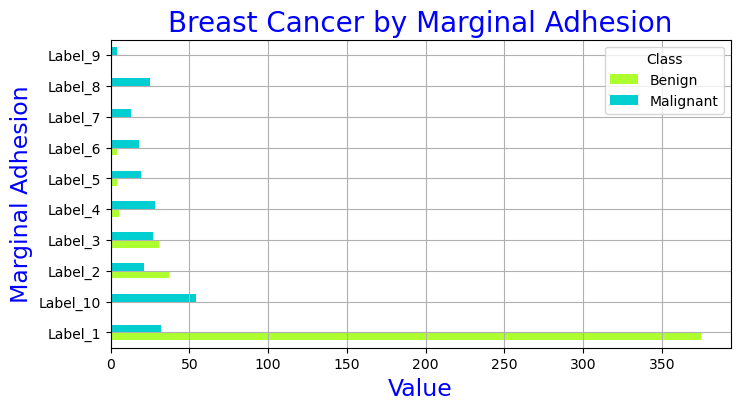

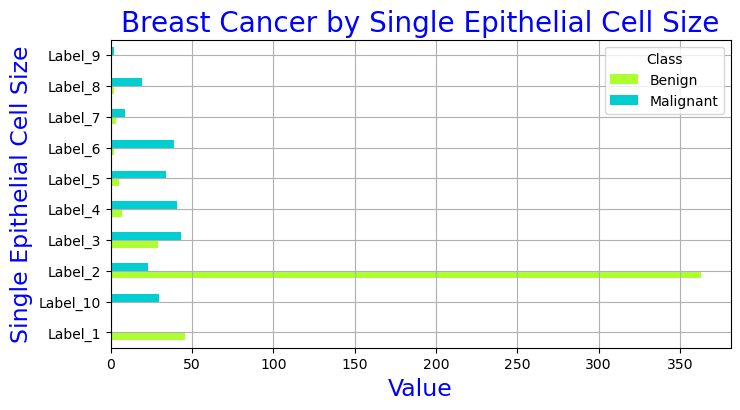

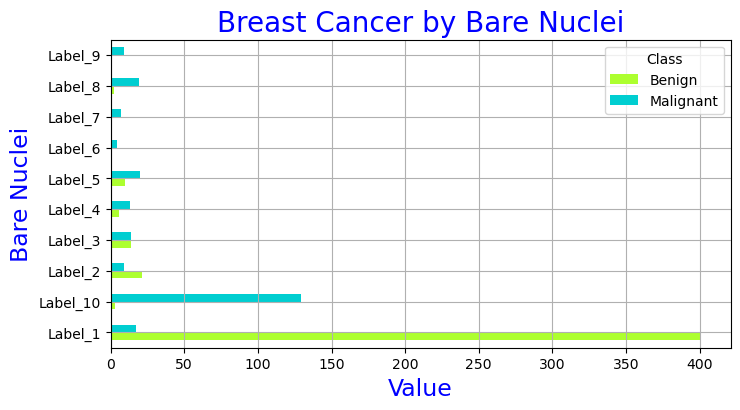

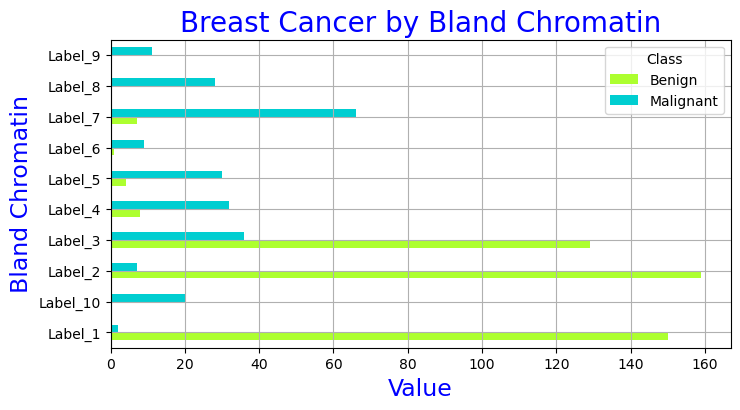

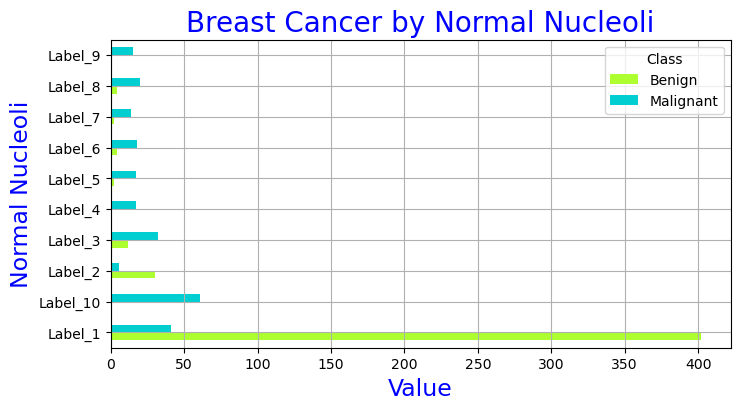

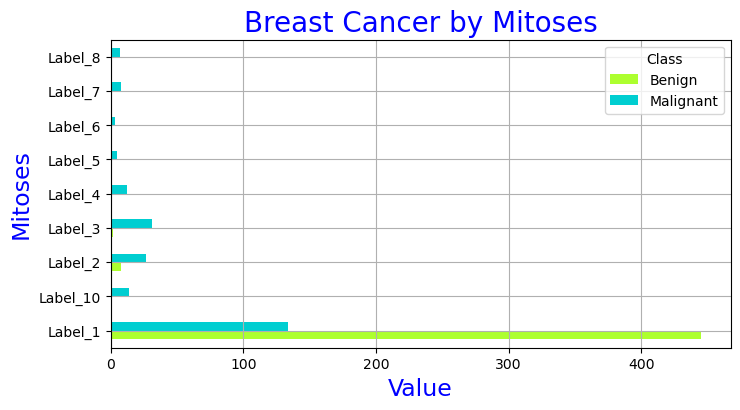

Class
Benign       458
Malignant    241
Name: count, dtype: int64


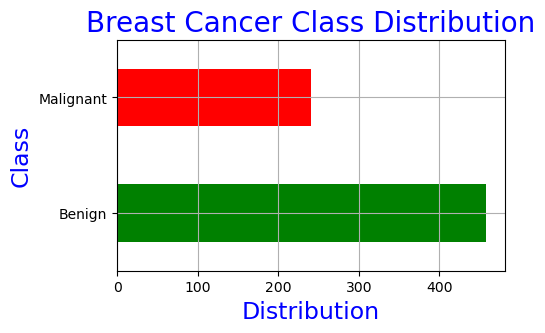

In [652]:
VZDataWis(Prep_WisCon)

In [653]:
def OutBCDetect(datawis,n,w,h,col):
    ArrayDW=nm.array(datawis.iloc[:,:-1])
    PCA_WD = decomposition.PCA(n_components=n)
    PCA_WD.fit(ArrayDW)
    varlist=PCA_WD.explained_variance_ratio_
    print("Present Variance Values of Components\n",varlist)
    COMPWS=["Comp-{}".format(i+1) for i in range(len(PCA_WD.explained_variance_ratio_.tolist()))]
    wismt.figure(figsize=(w,h))
    wismt.title(" PCA Component Variance for Components-{}\nMax Variance: {}".format(n, round(max(varlist),3)),fontsize=18)
    wismt.bar(COMPWS,PCA_WD.explained_variance_ratio_.tolist(),width=0.5,color=col)
    wismt.plot(PCA_WD.explained_variance_ratio_.tolist(),"--kD")
    wismt.xlabel("Components",fontsize=14)
    wismt.ylabel("Variance",fontsize=14)
    wismt.grid()
    wismt.show()
    return PCA_WD.explained_variance_ratio_

In [654]:
def NormBC(datawis):
    mmnorm = preprocessing.RobustScaler()
    nrm_datawis=mmnorm.fit_transform(datawis)
    return nrm_datawis

Present Variance Values of Components
 [0.70852742 0.07541213]


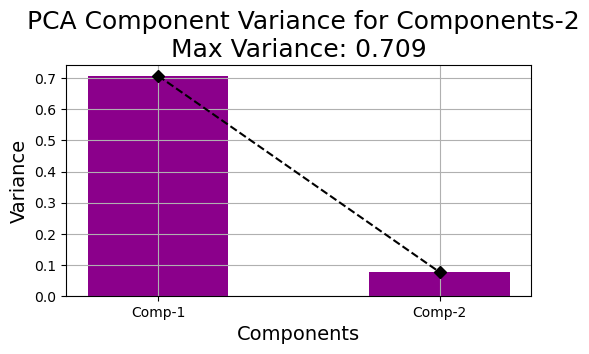

Present Variance Values of Components
 [0.69748134 0.0765345 ]


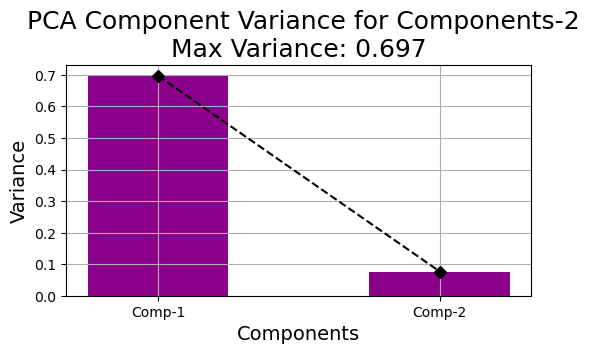

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0.25,0.00,0.00,0.000000,0.0,0.00,0.000000,0.000000,0.0,Benign
1,0.25,0.75,0.75,1.333333,2.5,2.25,0.000000,0.333333,0.0,Benign
2,-0.25,0.00,0.00,0.000000,0.0,0.25,0.000000,0.000000,0.0,Benign
3,0.50,1.75,1.75,0.000000,0.5,0.75,0.000000,2.000000,0.0,Benign
4,0.00,0.00,0.00,0.666667,0.0,0.00,0.000000,0.000000,0.0,Benign
5,1.00,2.25,2.25,2.333333,2.5,2.25,2.000000,2.000000,0.0,Malignant
6,-0.75,0.00,0.00,0.000000,0.0,2.25,0.000000,0.000000,0.0,Benign
7,-0.50,0.00,0.25,0.000000,0.0,0.00,0.000000,0.000000,0.0,Benign
8,-0.50,0.00,0.00,0.000000,0.0,0.00,-0.666667,0.000000,4.0,Benign
9,0.00,0.25,0.00,0.000000,0.0,0.00,-0.333333,0.000000,0.0,Benign


In [605]:
WsOutVal=[]
cmp_pca=2
wdth=6
WsOutVal.append(OutBCDetect(Cl_WisCon.drop('Class',axis=1),cmp_pca,wdth,3,"#8B008B"))

TotOut=[]
stat_out=[]
for orl in WsOutVal:
    for ol in orl:
        if ol>0.6:
            TotOut.append("Component-{}   =>    Variance Value {} (Outliers)".format(orl.tolist().index(ol)+1,round(ol,4)))
            stat_out.append(True)
if len(stat_out)==1 and True in stat_out:
    WisConNrm=NormBC(Cl_WisCon.drop('Class',axis=1))
WisConNrm=pa.DataFrame(WisConNrm,columns=Cl_WisCon.drop('Class',axis=1).columns.tolist())
WisConNrm['Class']=Cl_WisCon['Class']
WisConNrm['Class']=WisConNrm['Class'].replace(WisConNrm['Class'].unique(),['Benign','Malignant'])
OutBCDetect(WisConNrm.drop('Class',axis=1),cmp_pca,wdth,3,"#8B008B")
WisConNrm.head(10)

In [678]:
def WisFet1(datawis):
    print("---------------------------------------------------")
    X=datawis.drop('Class',axis=1)
    Y=datawis['Class']
    RFEWIS = feature_selection.RFE(estimator=linear_model.LogisticRegression(),n_features_to_select = 6, step = 0.6)
    Trained_RFE=RFEWIS.fit(X,Y)
    print("Selected Features Using RFE: \n",*X.columns[Trained_RFE.get_support()],sep="\n")
    return X.columns[Trained_RFE.get_support()]

In [679]:
def WisFet2(datawis):
    print("---------------------------------------------------")
    DFWis=datawis.copy()
    DFWis['Class']=DFWis['Class'].replace(DFWis['Class'].unique(),[i for i in range(len(DFWis['Class'].unique()))])
    datawiscorr=DFWis.corr()['Class']
    classcorr=pa.DataFrame({"Feature":datawiscorr.index,"Status":datawiscorr.tolist()})
    classcorr_selected=classcorr[(classcorr['Status']>=0.1)|(classcorr['Status']<=-0.1)]
    FETS2=classcorr_selected.iloc[0:-1].reset_index(drop=True)
    print("Selected Features Using Correlation: \n",*FETS2.Feature.tolist(),sep="\n")
    return FETS2

In [680]:
SeltdFtsWis1=WisFet1(WisConNrm)
print("---------------------------------------------------")
print("     Total Features Selected Using RFE: {}".format(len(SeltdFtsWis1)))
print("---------------------------------------------------")

SeltdFtsWis2df=WisFet2(WisConNrm)
SeltdFtsWis2=SeltdFtsWis2df.Feature.tolist()
print("---------------------------------------------------")
print("     Total Features Selected Using Correlation: {}".format(len(SeltdFtsWis2)))
print("---------------------------------------------------")
FinalFeatures=[]
for sfw in SeltdFtsWis1:
    if sfw in SeltdFtsWis2: 
        FinalFeatures.append(sfw)
print("------------------------------------------------------------------------------")
print("       Selected Features Using Hybrid Approach (RFE+Correlation): {}".format(len(FinalFeatures)))
print("\nFinally Selected Features: \n",*FinalFeatures,sep="\n")
print("------------------------------------------------------------------------------")

---------------------------------------------------
Selected Features Using RFE: 

Clump Thickness
Uniformity of Cell Shape
Marginal Adhesion
Bare Nuclei
Bland Chromatin
Mitoses
---------------------------------------------------
     Total Features Selected Using RFE: 6
---------------------------------------------------
---------------------------------------------------
Selected Features Using Correlation: 

Clump Thickness
Uniformity of Cell Size
Uniformity of Cell Shape
Marginal Adhesion
Single Epithelial Cell Size
Bare Nuclei
Bland Chromatin
Normal Nucleoli
Mitoses
---------------------------------------------------
     Total Features Selected Using Correlation: 9
---------------------------------------------------
------------------------------------------------------------------------------
       Selected Features Using Hybrid Approach (RFE+Correlation): 6

Finally Selected Features: 

Clump Thickness
Uniformity of Cell Shape
Marginal Adhesion
Bare Nuclei
Bland Chromatin
Mito

In [684]:
Cl_WisCon['Class']=Cl_WisCon['Class'].replace(Cl_WisCon['Class'].unique(),['Benign','Malignant'])
Cl_WisCon['Class'].value_counts()

Class
Benign       458
Malignant    241
Name: count, dtype: int64

In [690]:
PredWis=Cl_WisCon[FinalFeatures]
PredTarget=Cl_WisCon['Class']
PredWis

,Clump Thickness,Uniformity of Cell Shape,Marginal Adhesion,Bare Nuclei,Bland Chromatin,Mitoses
0,5,1,1,1,3,1
1,5,4,5,10,3,1
2,3,1,1,2,3,1
3,6,8,1,4,3,1
4,4,1,3,1,3,1
...,...,...,...,...,...,...
694,3,1,1,2,1,1
695,2,1,1,1,1,1
696,5,10,3,3,8,2
697,4,6,4,4,10,1


In [695]:
FinalWisCon=pa.concat([PredWis,PredTarget],axis=1)
FinalWisCon.head(10)

,Clump Thickness,Uniformity of Cell Shape,Marginal Adhesion,Bare Nuclei,Bland Chromatin,Mitoses,Class
0,5,1,1,1,3,1,Benign
1,5,4,5,10,3,1,Benign
2,3,1,1,2,3,1,Benign
3,6,8,1,4,3,1,Benign
4,4,1,3,1,3,1,Benign
5,8,10,8,10,9,1,Malignant
6,1,1,1,10,3,1,Benign
7,2,2,1,1,3,1,Benign
8,2,1,1,1,1,5,Benign
9,4,1,1,1,2,1,Benign


In [721]:
WsModels=[
    neural_network.MLPClassifier(),
    svm.LinearSVC(),
    neighbors.KNeighborsClassifier(),
    tree.DecisionTreeClassifier(),
    ensemble.RandomForestClassifier(),
    naive_bayes.BernoulliNB()
] 
WsModelsTuned=WsModels.copy()
WsNm=["Artificial Neural Networks", "Support Vector Machine", "K-Nearest Neighbours", "Decision Tree", "Random Forest", "Naive Bayes"]

paramtunes=[
    [{"activation":['identity', 'logistic', 'tanh', 'relu'],"solver":['lbfgs', 'sgd', 'adam'],"max_iter":[50,100,200]}],
    [{"loss":['hinge', 'squared_hinge'],"tol":[0.01,0.001,0.0001,0.00001],'C':[0.2,0.4,0.6,0.8,1.0],"max_iter":[100,200]}],
    [{"n_neighbors":list(range(2,5)),"algorithm":['auto','ball_tree','kd_tree','brute'],"weights":['uniform', 'distance']}],
    [{"criterion":['gini', 'entropy'],"splitter":['best','random'],"max_features":['sqrt', 'log2']}],
    [{'criterion': ['gini', 'entropy'],'max_features':['sqrt', 'log2'],'max_depth':[50,80]}],
    [{"alpha":[0.2,0.4,0.6,0.8,1.0],"fit_prior":[True,False]}]
]

for x in range(len(WsModelsTuned)):
    print("____________________________________________________")
    print("Tuning {}".format(WsNm[x]))
    print("____________________________________________________")
    t1 = datetime.datetime.now()
    GSTuneCV = model_selection.GridSearchCV(WsModelsTuned[x], paramtunes[x], cv = 5, scoring='accuracy')
    GSTuneCV.fit(PredWis, PredTarget)
    WsModelsTuned[x]=GSTuneCV.best_estimator_
    print("____________________________________________________")
    print("{} Tuning Complete".format(WsNm[x]))
    t2 = datetime.datetime.now()
    delta = t2 - t1
    time_prep=delta.total_seconds()
    print("Time Taken for Tuning '{}'': {} Seconds".format(WsNm[x],time_prep))
    print("____________________________________________________")
WsModelsTuned

____________________________________________________
Tuning Artificial Neural Networks
____________________________________________________
____________________________________________________
Artificial Neural Networks Tuning Complete
Time Taken for Tuning 'Artificial Neural Networks'': 39.653908 Seconds
____________________________________________________
____________________________________________________
Tuning Support Vector Machine
____________________________________________________
____________________________________________________
Support Vector Machine Tuning Complete
Time Taken for Tuning 'Support Vector Machine'': 2.307828 Seconds
____________________________________________________
____________________________________________________
Tuning K-Nearest Neighbours
____________________________________________________
____________________________________________________
K-Nearest Neighbours Tuning Complete
Time Taken for Tuning 'K-Nearest Neighbours'': 1.438108 Seconds
_____

[MLPClassifier(activation='identity', max_iter=50, solver='lbfgs'),
 LinearSVC(C=0.6, loss='hinge', max_iter=100, tol=0.001),
 KNeighborsClassifier(n_neighbors=3),
 DecisionTreeClassifier(max_features='sqrt'),
 RandomForestClassifier(criterion='entropy', max_depth=50),
 BernoulliNB(alpha=0.2)]

In [722]:
WsModelsTuned

[MLPClassifier(activation='identity', max_iter=50, solver='lbfgs'),
 LinearSVC(C=0.6, loss='hinge', max_iter=100, tol=0.001),
 KNeighborsClassifier(n_neighbors=3),
 DecisionTreeClassifier(max_features='sqrt'),
 RandomForestClassifier(criterion='entropy', max_depth=50),
 BernoulliNB(alpha=0.2)]

In [723]:
HModel=ensemble.StackingClassifier(estimators=[
        ('MS1', WsModelsTuned[5]), 
        ('MS2',WsModelsTuned[4])],
        final_estimator=WsModelsTuned[4])
'''HModel=ensemble.VotingClassifier(estimators=[ 
        ('MS2',WsModelsTuned[5]),
        ('MS3', WsModelsTuned[4])],voting='soft')'''
if len(WsModelsTuned)<7:
    WsModelsTuned.append(HModel)
else:
    WsModelsTuned.pop(6)
    WsModelsTuned.append(HModel)
WsNm=["Artificial Neural Networks", "Support Vector Machine", "K-Nearest Neighbours", "Decision Tree", "Random Forest", "Naive Bayes", "Hybrid"]
WsModelsTuned

[MLPClassifier(activation='identity', max_iter=50, solver='lbfgs'),
 LinearSVC(C=0.6, loss='hinge', max_iter=100, tol=0.001),
 KNeighborsClassifier(n_neighbors=3),
 DecisionTreeClassifier(max_features='sqrt'),
 RandomForestClassifier(criterion='entropy', max_depth=50),
 BernoulliNB(alpha=0.2),
 StackingClassifier(estimators=[('MS1', BernoulliNB(alpha=0.2)),
                                ('MS2',
                                 RandomForestClassifier(criterion='entropy',
                                                        max_depth=50))],
                    final_estimator=RandomForestClassifier(criterion='entropy',
                                                           max_depth=50))]

In [699]:
def SegmentData(wx, wy):
    XTrWs, XTsWs, YTrWs, YTsWs=model_selection.train_test_split(wx, wy, test_size=0.25, random_state=42)
    return XTrWs, XTsWs, YTrWs, YTsWs

Test Class Distribution: 
 Class
Benign       118
Malignant     57
Name: count, dtype: int64
_____________________________________________________________________________
                            Artificial Neural Networks 
_____________________________________________________________________________


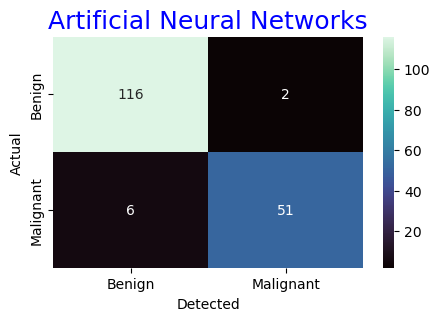


Test Accuracy: 95.43%


Train Accuracy: 97.14%


Classification Report for Artificial Neural Networks 

              precision    recall  f1-score   support

      Benign       0.95      0.98      0.97       118
   Malignant       0.96      0.89      0.93        57

    accuracy                           0.95       175
   macro avg       0.96      0.94      0.95       175
weighted avg       0.95      0.95      0.95       175

_____________________________________________________________________________
                            Support Vector Machine 
_____________________________________________________________________________


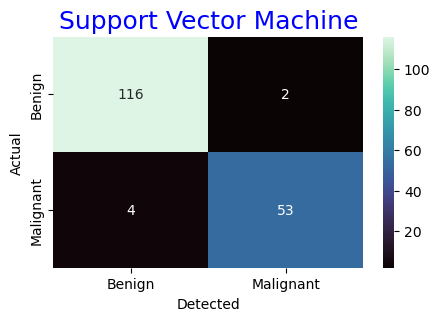


Test Accuracy: 96.57%


Train Accuracy: 96.56%


Classification Report for Support Vector Machine 

              precision    recall  f1-score   support

      Benign       0.97      0.98      0.97       118
   Malignant       0.96      0.93      0.95        57

    accuracy                           0.97       175
   macro avg       0.97      0.96      0.96       175
weighted avg       0.97      0.97      0.97       175

_____________________________________________________________________________
                            K-Nearest Neighbours 
_____________________________________________________________________________


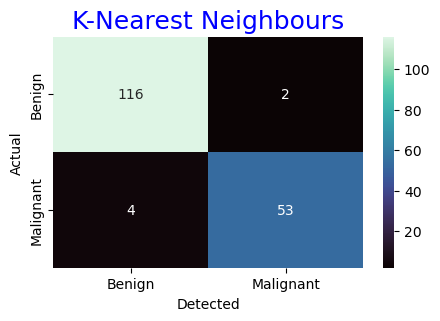


Test Accuracy: 96.57%


Train Accuracy: 97.9%


Classification Report for K-Nearest Neighbours 

              precision    recall  f1-score   support

      Benign       0.97      0.98      0.97       118
   Malignant       0.96      0.93      0.95        57

    accuracy                           0.97       175
   macro avg       0.97      0.96      0.96       175
weighted avg       0.97      0.97      0.97       175

_____________________________________________________________________________
                            Decision Tree 
_____________________________________________________________________________


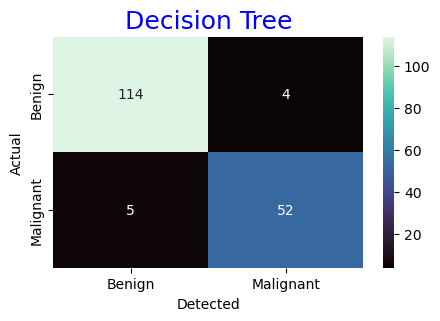


Test Accuracy: 94.86%


Train Accuracy: 100.0%


Classification Report for Decision Tree 

              precision    recall  f1-score   support

      Benign       0.96      0.97      0.96       118
   Malignant       0.93      0.91      0.92        57

    accuracy                           0.95       175
   macro avg       0.94      0.94      0.94       175
weighted avg       0.95      0.95      0.95       175

_____________________________________________________________________________
                            Random Forest 
_____________________________________________________________________________


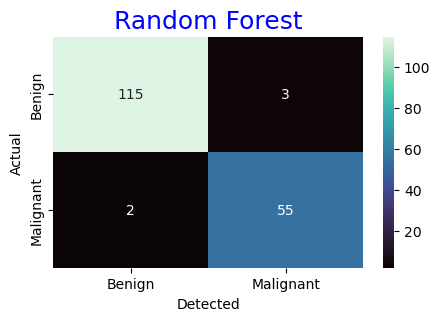


Test Accuracy: 97.14%


Train Accuracy: 100.0%


Classification Report for Random Forest 

              precision    recall  f1-score   support

      Benign       0.98      0.97      0.98       118
   Malignant       0.95      0.96      0.96        57

    accuracy                           0.97       175
   macro avg       0.97      0.97      0.97       175
weighted avg       0.97      0.97      0.97       175

_____________________________________________________________________________
                            Naive Bayes 
_____________________________________________________________________________


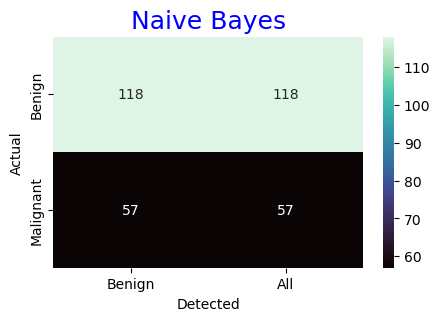


Test Accuracy: 67.43%


Train Accuracy: 64.89%


Classification Report for Naive Bayes 

              precision    recall  f1-score   support

      Benign       0.67      1.00      0.81       118
   Malignant       0.00      0.00      0.00        57

    accuracy                           0.67       175
   macro avg       0.34      0.50      0.40       175
weighted avg       0.45      0.67      0.54       175

_____________________________________________________________________________
                            Hybrid 
_____________________________________________________________________________


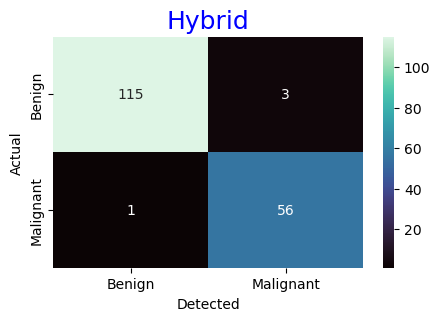


Test Accuracy: 97.71%


Train Accuracy: 98.09%


Classification Report for Hybrid 

              precision    recall  f1-score   support

      Benign       0.99      0.97      0.98       118
   Malignant       0.95      0.98      0.97        57

    accuracy                           0.98       175
   macro avg       0.97      0.98      0.97       175
weighted avg       0.98      0.98      0.98       175

_____________________________________________________________________________


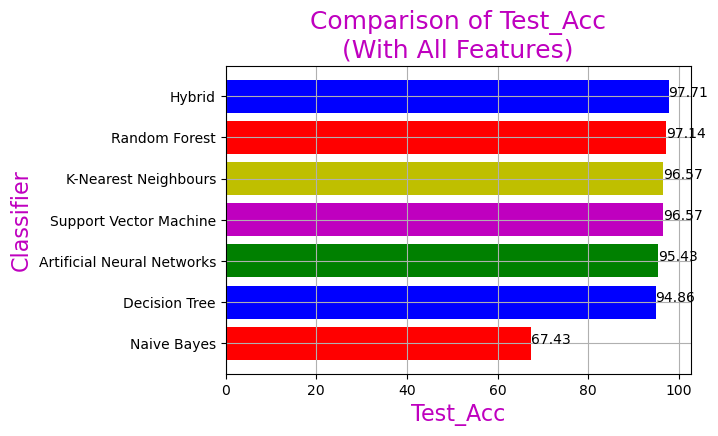

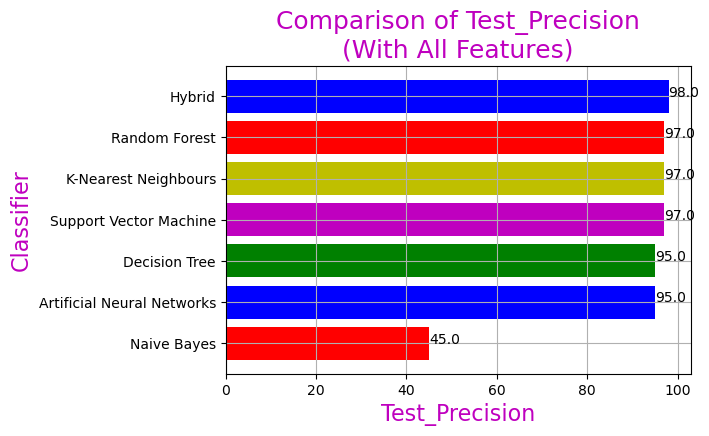

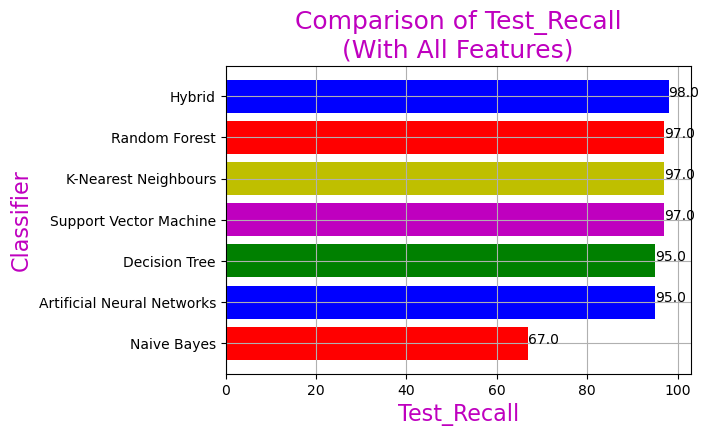

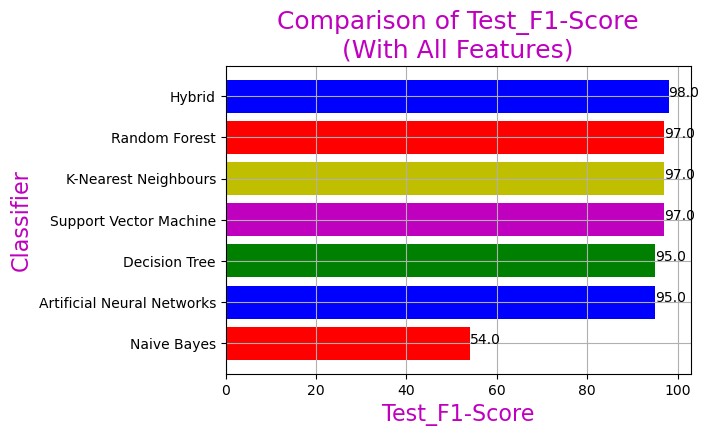

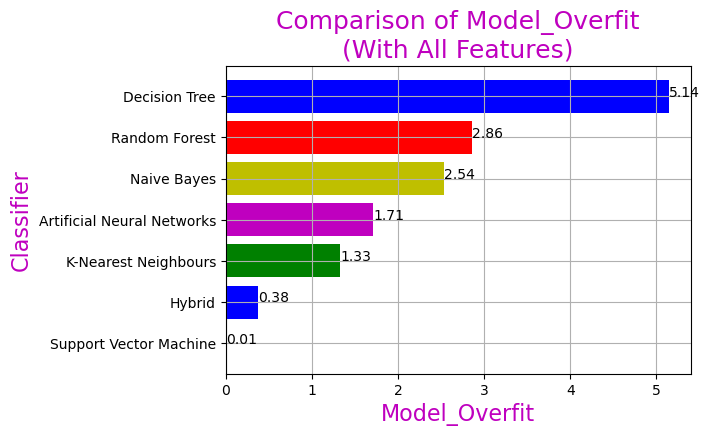

,Classifier,Train_Acc,Test_Acc,Test_Precision,Test_Recall,Test_F1-Score,Model_Overfit
0,Hybrid,98.09,97.71,98.0,98.0,98.0,0.38
1,Random Forest,100.00,97.14,97.0,97.0,97.0,2.86
2,Support Vector Machine,96.56,96.57,97.0,97.0,97.0,0.01
3,K-Nearest Neighbours,97.90,96.57,97.0,97.0,97.0,1.33
4,Artificial Neural Networks,97.14,95.43,95.0,95.0,95.0,1.71
5,Decision Tree,100.00,94.86,95.0,95.0,95.0,5.14
6,Naive Bayes,64.89,67.43,45.0,67.0,54.0,2.54


In [700]:
# With All Features
XWsTr,XWsTs,yWsTr,yWsTs=SegmentData(Cl_WisCon.drop('Class',axis=1), Cl_WisCon['Class'])
print("Test Class Distribution: \n",yWsTs.value_counts())

MetricsWisConAF=[[],[],[],[],[],[]]
BkpMd=[]
print("_____________________________________________________________________________")
for i in range(len(WsModelsTuned)):
    print("                            {} ".format(WsNm[i]))
    print("_____________________________________________________________________________")
    WisLoopMet=[[],[],[],[],[],[]]
    for ts in range(10):
        WsModelsTuned[i].fit(XWsTr,yWsTr)
        BrCn_Predict_Tst=WsModelsTuned[i].predict(XWsTs)
        BrCn_Predict_TrN=WsModelsTuned[i].predict(XWsTr)
        WisLoopMet[0].append(round(metrics.accuracy_score(yWsTs,BrCn_Predict_Tst)*100,2))
        
        Pred_Metrics=metrics.precision_recall_fscore_support(yWsTs,BrCn_Predict_Tst, average='weighted')[:-1]
        WisLoopMet[1].append(round(Pred_Metrics[0],2)*100)
        WisLoopMet[2].append(round(Pred_Metrics[1],2)*100)
        WisLoopMet[3].append(round(Pred_Metrics[2],2)*100)
        cmt=pa.crosstab(yWsTs, BrCn_Predict_Tst, rownames=['Actual'], colnames=['Detected'], margins=True)
        WisLoopMet[4].append(cmt.iloc[:2,:2])
        WisLoopMet[5].append(metrics.classification_report(yWsTs, BrCn_Predict_Tst))
    BkpMd.append(WisLoopMet[0])
    mxsln=WisLoopMet[0].index(max(WisLoopMet[0]))
    MetricsWisConAF[0].append(round(metrics.accuracy_score(yWsTr,BrCn_Predict_TrN)*100,2))
    MetricsWisConAF[1].append(WisLoopMet[0][mxsln])
    MetricsWisConAF[2].append(WisLoopMet[1][mxsln])
    MetricsWisConAF[3].append(WisLoopMet[2][mxsln])
    MetricsWisConAF[4].append(WisLoopMet[3][mxsln])
    ov_fit_mdl=round(abs(round(metrics.accuracy_score(yWsTr,BrCn_Predict_TrN)*100,2)-WisLoopMet[0][mxsln]),2)
    MetricsWisConAF[5].append(ov_fit_mdl)
    wismt.figure(figsize=(5,3))
    wismt.title("{}".format(WsNm[i]), fontsize=18,color="b")
    py_seb.heatmap(WisLoopMet[4][mxsln],fmt="d",annot=True,cmap="mako")
    wismt.show()
    print("\nTest Accuracy: {}%\n".format(WisLoopMet[0][mxsln]))
    print("\nTrain Accuracy: {}%\n".format(round(metrics.accuracy_score(yWsTr,BrCn_Predict_TrN)*100,2)))
    print("\nClassification Report for {} \n\n{}".format(WsNm[i],WisLoopMet[5][mxsln]))
    print("_____________________________________________________________________________")

DFWisConResultAF=pa.DataFrame({
    "Classifier":WsNm,
    "Train_Acc":MetricsWisConAF[0],
    "Test_Acc":MetricsWisConAF[1],
    "Test_Precision":MetricsWisConAF[2],
    "Test_Recall":MetricsWisConAF[3],
    "Test_F1-Score":MetricsWisConAF[4],
    "Model_Overfit":MetricsWisConAF[5]
})
Clrs=["r","b","g","m","y"]
for ar in DFWisConResultAF.columns.tolist()[2:]:
    dfcurr=DFWisConResultAF.sort_values(by=ar,ascending=True)
    wismt.figure(figsize=(6,4))
    wismt.title("Comparison of {}\n(With All Features)".format(ar),fontsize=18,color="m")
    wismt.barh(dfcurr['Classifier'],dfcurr[ar],color=Clrs)
    wismt.ylabel("Classifier",fontsize=16,color="m")
    wismt.xlabel("{}".format(ar),fontsize=16,color="m")
    for slx, vl in enumerate(dfcurr["{}".format(ar)]):
        wismt.text(vl, slx, str(vl))
    wismt.grid()
    wismt.show()
DFWisConResultAF1=DFWisConResultAF.sort_values(by='Test_Acc',ascending=False).reset_index(drop=True)
DFWisConResultAF1.to_csv("Breast_Cancer_Result.csv")
DFWisConResultAF1

Test Class Distribution: 
 Class
Benign       118
Malignant     57
Name: count, dtype: int64
_____________________________________________________________________________
                            Artificial Neural Networks 
_____________________________________________________________________________


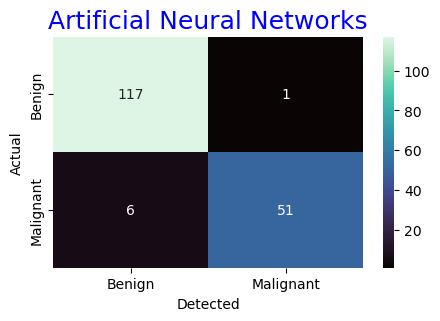


Test Accuracy: 96.0%


Train Accuracy: 96.95%


Classification Report for Artificial Neural Networks 

              precision    recall  f1-score   support

      Benign       0.95      0.99      0.97       118
   Malignant       0.98      0.89      0.94        57

    accuracy                           0.96       175
   macro avg       0.97      0.94      0.95       175
weighted avg       0.96      0.96      0.96       175

_____________________________________________________________________________
                            Support Vector Machine 
_____________________________________________________________________________


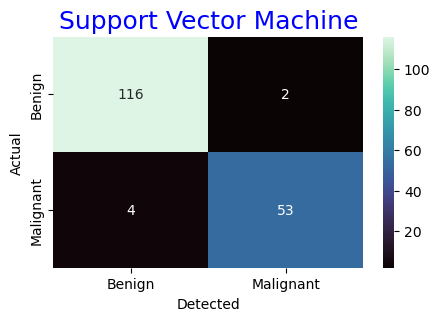


Test Accuracy: 96.57%


Train Accuracy: 97.14%


Classification Report for Support Vector Machine 

              precision    recall  f1-score   support

      Benign       0.97      0.98      0.97       118
   Malignant       0.96      0.93      0.95        57

    accuracy                           0.97       175
   macro avg       0.97      0.96      0.96       175
weighted avg       0.97      0.97      0.97       175

_____________________________________________________________________________
                            K-Nearest Neighbours 
_____________________________________________________________________________


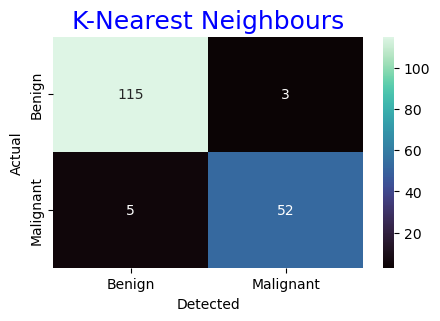


Test Accuracy: 95.43%


Train Accuracy: 98.28%


Classification Report for K-Nearest Neighbours 

              precision    recall  f1-score   support

      Benign       0.96      0.97      0.97       118
   Malignant       0.95      0.91      0.93        57

    accuracy                           0.95       175
   macro avg       0.95      0.94      0.95       175
weighted avg       0.95      0.95      0.95       175

_____________________________________________________________________________
                            Decision Tree 
_____________________________________________________________________________


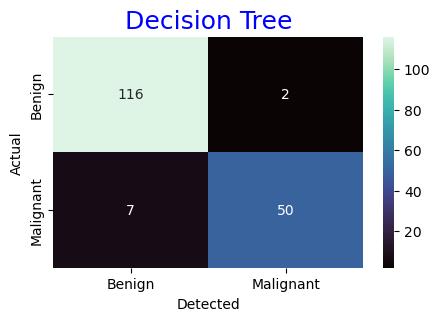


Test Accuracy: 94.86%


Train Accuracy: 100.0%


Classification Report for Decision Tree 

              precision    recall  f1-score   support

      Benign       0.94      0.98      0.96       118
   Malignant       0.96      0.88      0.92        57

    accuracy                           0.95       175
   macro avg       0.95      0.93      0.94       175
weighted avg       0.95      0.95      0.95       175

_____________________________________________________________________________
                            Random Forest 
_____________________________________________________________________________


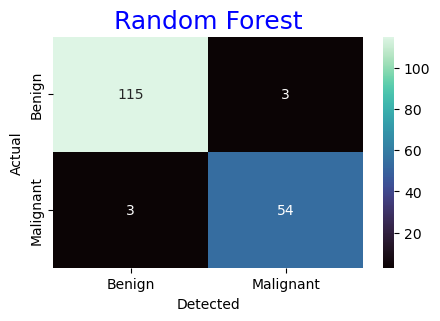


Test Accuracy: 96.57%


Train Accuracy: 100.0%


Classification Report for Random Forest 

              precision    recall  f1-score   support

      Benign       0.97      0.97      0.97       118
   Malignant       0.95      0.95      0.95        57

    accuracy                           0.97       175
   macro avg       0.96      0.96      0.96       175
weighted avg       0.97      0.97      0.97       175

_____________________________________________________________________________
                            Naive Bayes 
_____________________________________________________________________________


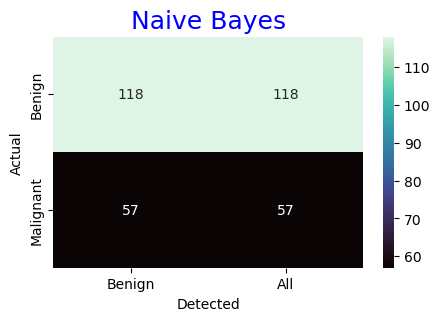


Test Accuracy: 67.43%


Train Accuracy: 64.89%


Classification Report for Naive Bayes 

              precision    recall  f1-score   support

      Benign       0.67      1.00      0.81       118
   Malignant       0.00      0.00      0.00        57

    accuracy                           0.67       175
   macro avg       0.34      0.50      0.40       175
weighted avg       0.45      0.67      0.54       175

_____________________________________________________________________________
                            Hybrid 
_____________________________________________________________________________


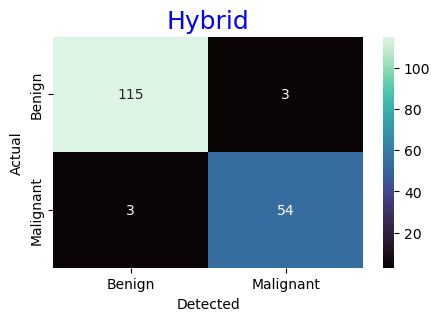


Test Accuracy: 96.57%


Train Accuracy: 99.62%


Classification Report for Hybrid 

              precision    recall  f1-score   support

      Benign       0.97      0.97      0.97       118
   Malignant       0.95      0.95      0.95        57

    accuracy                           0.97       175
   macro avg       0.96      0.96      0.96       175
weighted avg       0.97      0.97      0.97       175

_____________________________________________________________________________


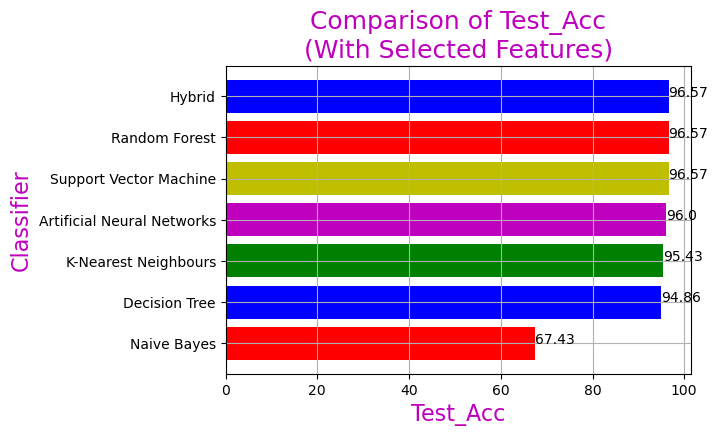

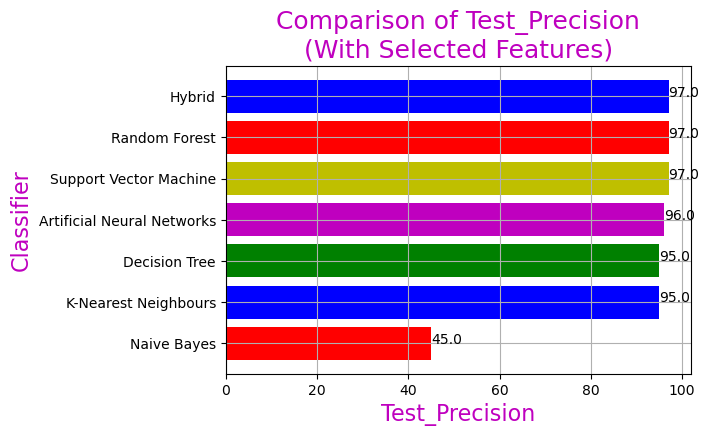

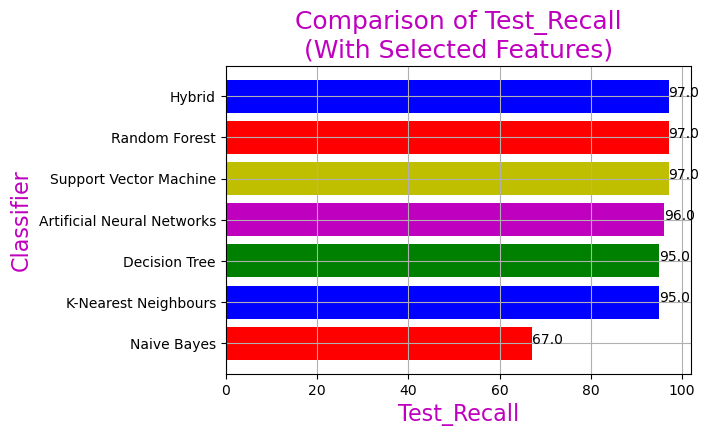

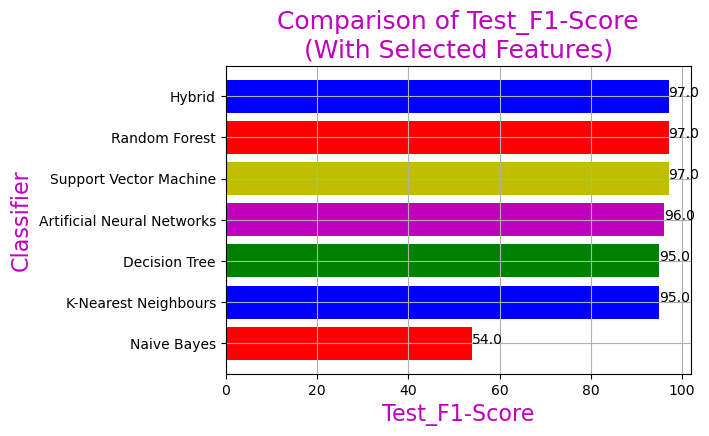

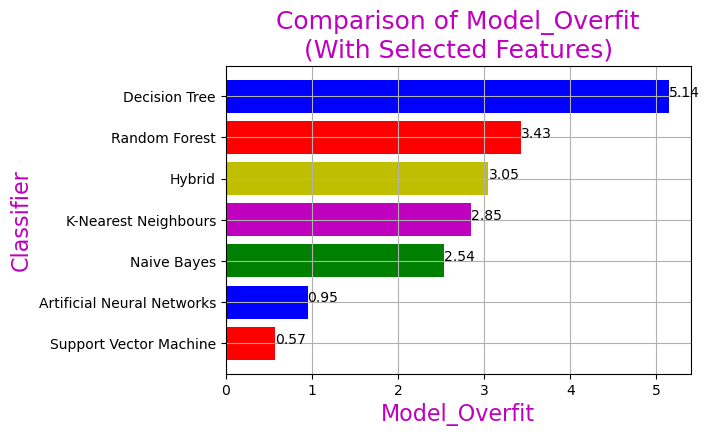

,Classifier,Train_Acc,Test_Acc,Test_Precision,Test_Recall,Test_F1-Score,Model_Overfit
0,Support Vector Machine,97.14,96.57,97.0,97.0,97.0,0.57
1,Random Forest,100.00,96.57,97.0,97.0,97.0,3.43
2,Hybrid,99.62,96.57,97.0,97.0,97.0,3.05
3,Artificial Neural Networks,96.95,96.00,96.0,96.0,96.0,0.95
4,K-Nearest Neighbours,98.28,95.43,95.0,95.0,95.0,2.85
5,Decision Tree,100.00,94.86,95.0,95.0,95.0,5.14
6,Naive Bayes,64.89,67.43,45.0,67.0,54.0,2.54


In [701]:
#With Selected Features
XWsTr,XWsTs,yWsTr,yWsTs=SegmentData(FinalWisCon.drop('Class',axis=1), FinalWisCon['Class'])
print("Test Class Distribution: \n",yWsTs.value_counts())


MetricsWisConSF=[[],[],[],[],[],[]]
BkpMd=[]
print("_____________________________________________________________________________")
for i in range(len(WsModelsTuned)):
    print("                            {} ".format(WsNm[i]))
    print("_____________________________________________________________________________")
    WisLoopMet=[[],[],[],[],[],[]]
    for ts in range(10):
        WsModelsTuned[i].fit(XWsTr,yWsTr)
        BrCn_Predict_Tst=WsModelsTuned[i].predict(XWsTs)
        BrCn_Predict_TrN=WsModelsTuned[i].predict(XWsTr)
        WisLoopMet[0].append(round(metrics.accuracy_score(yWsTs,BrCn_Predict_Tst)*100,2))
        
        Pred_Metrics=metrics.precision_recall_fscore_support(yWsTs,BrCn_Predict_Tst, average='weighted')[:-1]
        WisLoopMet[1].append(round(Pred_Metrics[0],2)*100)
        WisLoopMet[2].append(round(Pred_Metrics[1],2)*100)
        WisLoopMet[3].append(round(Pred_Metrics[2],2)*100)
        cmt=pa.crosstab(yWsTs, BrCn_Predict_Tst, rownames=['Actual'], colnames=['Detected'], margins=True)
        WisLoopMet[4].append(cmt.iloc[:2,:2])
        WisLoopMet[5].append(metrics.classification_report(yWsTs, BrCn_Predict_Tst))
    BkpMd.append(WisLoopMet[0])
    mxsln=WisLoopMet[0].index(max(WisLoopMet[0]))
    MetricsWisConSF[0].append(round(metrics.accuracy_score(yWsTr,BrCn_Predict_TrN)*100,2))
    MetricsWisConSF[1].append(WisLoopMet[0][mxsln])
    MetricsWisConSF[2].append(WisLoopMet[1][mxsln])
    MetricsWisConSF[3].append(WisLoopMet[2][mxsln])
    MetricsWisConSF[4].append(WisLoopMet[3][mxsln])
    ov_fit_mdl=round(abs(round(metrics.accuracy_score(yWsTr,BrCn_Predict_TrN)*100,2)-WisLoopMet[0][mxsln]),2)
    MetricsWisConSF[5].append(ov_fit_mdl)
    wismt.figure(figsize=(5,3))
    wismt.title("{}".format(WsNm[i]), fontsize=18,color="b")
    py_seb.heatmap(WisLoopMet[4][mxsln],fmt="d",annot=True,cmap="mako")
    wismt.show()
    print("\nTest Accuracy: {}%\n".format(WisLoopMet[0][mxsln]))
    print("\nTrain Accuracy: {}%\n".format(round(metrics.accuracy_score(yWsTr,BrCn_Predict_TrN)*100,2)))
    print("\nClassification Report for {} \n\n{}".format(WsNm[i],WisLoopMet[5][mxsln]))
    print("_____________________________________________________________________________")

DFWisConResultSF=pa.DataFrame({
    "Classifier":WsNm,
    "Train_Acc":MetricsWisConSF[0],
    "Test_Acc":MetricsWisConSF[1],
    "Test_Precision":MetricsWisConSF[2],
    "Test_Recall":MetricsWisConSF[3],
    "Test_F1-Score":MetricsWisConSF[4],
    "Model_Overfit":MetricsWisConSF[5]
})
Clrs=["r","b","g","m","y"]
for ar in DFWisConResultSF.columns.tolist()[2:]:
    dfcurr=DFWisConResultSF.sort_values(by=ar,ascending=True)
    wismt.figure(figsize=(6,4))
    wismt.title("Comparison of {}\n(With Selected Features)".format(ar),fontsize=18,color="m")
    wismt.barh(dfcurr['Classifier'],dfcurr[ar],color=Clrs)
    wismt.ylabel("Classifier",fontsize=16,color="m")
    wismt.xlabel("{}".format(ar),fontsize=16,color="m")
    for slx, vl in enumerate(dfcurr["{}".format(ar)]):
        wismt.text(vl, slx, str(vl))
    wismt.grid()
    wismt.show()
DFWisConResultSF1=DFWisConResultSF.sort_values(by='Test_Acc',ascending=False).reset_index(drop=True)
DFWisConResultSF1.to_csv("Result_SelectedFeatures.csv")
DFWisConResultSF1

In [702]:
DFWisConResultAF1

,Classifier,Train_Acc,Test_Acc,Test_Precision,Test_Recall,Test_F1-Score,Model_Overfit
0,Hybrid,98.09,97.71,98.0,98.0,98.0,0.38
1,Random Forest,100.00,97.14,97.0,97.0,97.0,2.86
2,Support Vector Machine,96.56,96.57,97.0,97.0,97.0,0.01
3,K-Nearest Neighbours,97.90,96.57,97.0,97.0,97.0,1.33
4,Artificial Neural Networks,97.14,95.43,95.0,95.0,95.0,1.71
5,Decision Tree,100.00,94.86,95.0,95.0,95.0,5.14
6,Naive Bayes,64.89,67.43,45.0,67.0,54.0,2.54


In [703]:
DFWisConResultSF1

,Classifier,Train_Acc,Test_Acc,Test_Precision,Test_Recall,Test_F1-Score,Model_Overfit
0,Support Vector Machine,97.14,96.57,97.0,97.0,97.0,0.57
1,Random Forest,100.00,96.57,97.0,97.0,97.0,3.43
2,Hybrid,99.62,96.57,97.0,97.0,97.0,3.05
3,Artificial Neural Networks,96.95,96.00,96.0,96.0,96.0,0.95
4,K-Nearest Neighbours,98.28,95.43,95.0,95.0,95.0,2.85
5,Decision Tree,100.00,94.86,95.0,95.0,95.0,5.14
6,Naive Bayes,64.89,67.43,45.0,67.0,54.0,2.54


In [704]:
OptMdlBc=WsModelsTuned[-1]
OptMdlBc.fit(Cl_WisCon.drop('Class',axis=1), Cl_WisCon['Class'])
print("Optimum Model\n",DFWisConResultAF1['Classifier'][0],"Model(Stacking)")
optmd = 'Optimum_Model.sav'
pickle.dump(OptMdlBc, open(optmd, 'wb'))
print("\nOptimum Model Structure:\n")
OptMdlBc

Optimum Model
 Hybrid Model(Stacking)

Optimum Model Structure:



StackingClassifier(estimators=[('MS1', BernoulliNB(alpha=0.2)),
                               ('MS2',
                                RandomForestClassifier(max_depth=50,
                                                       max_features='log2'))],
                   final_estimator=RandomForestClassifier(max_depth=50,
                                                          max_features='log2'))

In [705]:
Cl_WisCon.tail()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
694,3,1,1,1,3,2,1,1,1,Benign
695,2,1,1,1,2,1,1,1,1,Benign
696,5,10,10,3,7,3,8,10,2,Malignant
697,4,8,6,4,3,4,10,6,1,Malignant
698,4,8,8,5,4,5,10,4,1,Malignant


In [706]:
Cl_WisCon['Clump Thickness'].value_counts()

Clump Thickness
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: count, dtype: int64

In [713]:
Cl_WisConCr=Cl_WisCon.copy()
print(Cl_WisConCr['Class'].unique())
Cl_WisConCr['Class']=Cl_WisConCr['Class'].replace(Cl_WisConCr['Class'].unique(),[i for i in range(len(Cl_WisConCr['Class'].unique()))])
print(Cl_WisConCr['Class'].unique())
fetscr=Cl_WisConCr.corr()['Class'].index.tolist()
fetval=Cl_WisConCr.corr()['Class'].tolist()
fetcrdf=pa.DataFrame({"Feature":fetscr,"Influence":fetval})
fetcrdf=fetcrdf.sort_values(by="Influence",ascending=False).iloc[1:4].reset_index(drop=True)
fetcrdf

['Benign' 'Malignant']
[0 1]


,Feature,Influence
0,Bare Nuclei,0.818968
1,Uniformity of Cell Shape,0.818934
2,Uniformity of Cell Size,0.817904


In [714]:
cls=fetcrdf.Feature.tolist()
ch2val=[]
for x in cls:
    chi2, p, dof, ex = chi2_contingency(pa.crosstab(Cl_WisConCr[x], Cl_WisConCr['Class']))
    chi2=round(chi2,2)
    ch2val.append(chi2)
fetcrdf['Chi2']=ch2val
fetcrdf.to_csv("WisCon_Stat.csv")
fetcrdf

,Feature,Influence,Chi2
0,Bare Nuclei,0.818968,495.39
1,Uniformity of Cell Shape,0.818934,525.76
2,Uniformity of Cell Size,0.817904,543.67
